# Rosenthal's Solution Simulation

**Rosenthal Equation:** where d is the distance from heat source, U is laser velocity

<p style="text-align: center;">$T_n(x,y) = T_0(x,y) + \frac{q}{2\pi k d} \cdot e^{-\frac{U(d+x)}{2\alpha}}$</p>


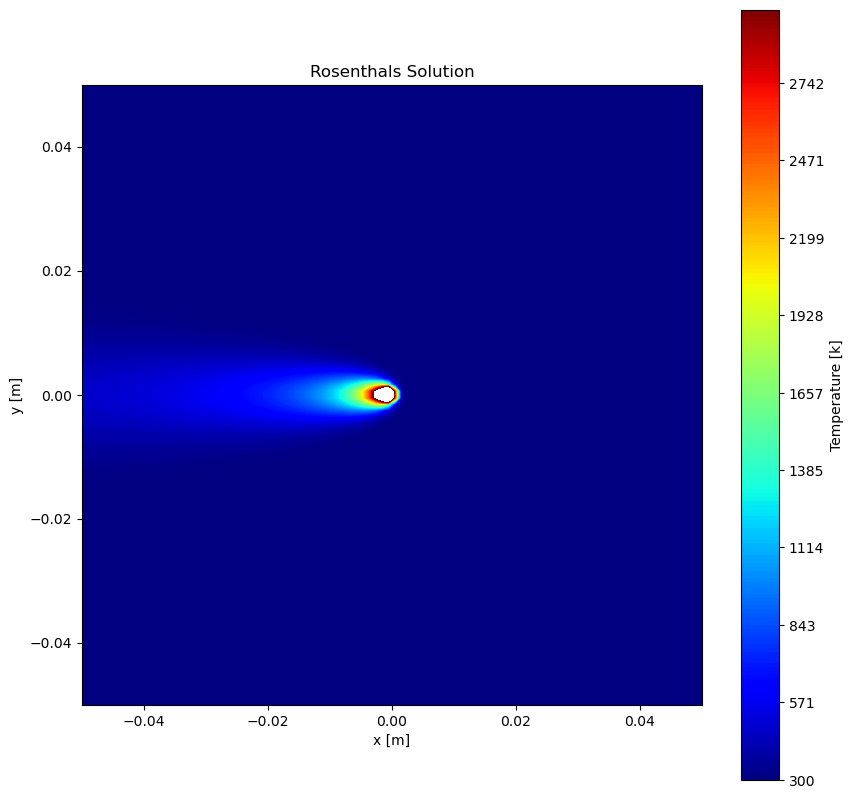

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
############################################################################################
# Plate Initialization:

x_length = 100/1000;               # [mm]-->[m] convert
y_length = 100/1000;               # [mm]-->[m] convert
nx = 100;                         # number of grid points
ny = 100;                         # number of grid points

# Plate Properties Using: AISI Type 316L Stainless Steel

T0 = 300; 			              # initial ambient temperature [K]
k = 15; 			              # conductivity coefficient [W/m/K]
cp = .5*1000; 			          # specific heat [J/g/c]-->[J/kg/K]
rho = 8*1000; 		              # density [g/cc]-->[kg/m^3]

# Laser Initialization:

q = 800; 			              # laser power [W]
Velo = 10/1000; 	              # laser speed x [m/s] (from [mm/sec])

# Simulation Settings:
Temp_Definition  = 200;           # levels of temperature that will be displayed on figure
Est_Max_Temp = 3000;              # estimated max temp [K] (Should never exceed 3500 [K])
                                  
############################################################################################

[x,y] = np.meshgrid(np.linspace(-x_length/2,x_length/2,nx),np.linspace(-y_length/2,y_length/2,ny)); # [m]

T = np.zeros((nx,ny))   # initialize matrix 

# Calulate thermal diffusivity, temperatures using Rosenthal's solution

for i in range(nx):
  for j in range(ny):
    alpha = k/(rho*cp);
    d = np.sqrt((x[i][j]**2)+(y[i][j]**2));  
    T[i][j] = T0+q/(2*np.pi*k*d)*np.exp(-(Velo/(2*alpha))*(x[i][j]+d));

    # Plotting
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(xlim=(-x_length/2, x_length/2), ylim=(-y_length/2, y_length/2),xlabel='x [m]',ylabel='y [m]')
ax.set_aspect('equal', 'box')
ax.set_title('Rosenthals Solution')

cvals = np.linspace(T0,Est_Max_Temp,Temp_Definition);   # define dontour levels
T_Cont = plt.contourf(x, y,T,cvals,cmap = cm.jet)       

plt.colorbar(T_Cont,label = 'Temperature [k]', orientation="vertical")  #temp scale

plt.show()